In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def get_historic_price(symbol, exchange='bitfinex', after='2022-09-01'):
    url = "https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc".format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        "periods": "3600", 
        "after": str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=['CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [4]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2023-06-16 16:16:28.288020')

In [5]:
btc = get_historic_price("btc", 'bitstamp', after=last_week)

In [6]:
eth = get_historic_price("eth", 'bitstamp', after=last_week)

In [7]:
xrp = get_historic_price("xrp", 'bitstamp', after=last_week)

In [8]:
btc.head()


,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-06-16 17:00:00,25805,25974,25749,25939,491.983454,1.270429e+07
2023-06-16 18:00:00,25940,26305,25940,26296,302.322373,7.891666e+06
2023-06-16 19:00:00,26300,26485,26254,26339,192.706864,5.076677e+06
2023-06-16 20:00:00,26338,26389,26260,26364,59.010897,1.554592e+06
2023-06-16 21:00:00,26362,26433,26310,26395,32.489093,8.567906e+05


<Axes: xlabel='CloseTime'>

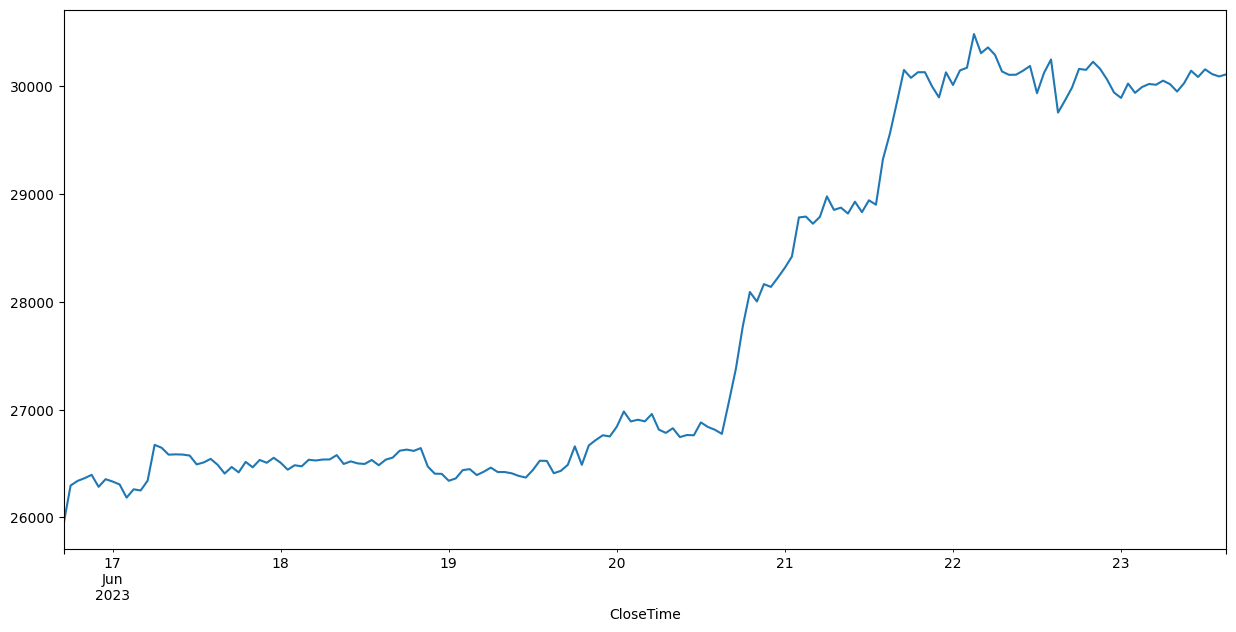

In [9]:
btc['ClosePrice'].plot(figsize=(15, 7))

In [10]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-06-16 17:00:00,1680.0,1687.0,1676.1,1684.4,665.251388,1.117895e+06
2023-06-16 18:00:00,1685.5,1700.9,1683.9,1697.2,696.630580,1.178403e+06
2023-06-16 19:00:00,1697.4,1727.4,1694.0,1716.2,453.739056,7.786590e+05
2023-06-16 20:00:00,1715.9,1720.8,1711.6,1720.7,139.445336,2.394129e+05
2023-06-16 21:00:00,1721.5,1727.3,1717.7,1725.8,151.211484,2.604558e+05


<Axes: xlabel='CloseTime'>

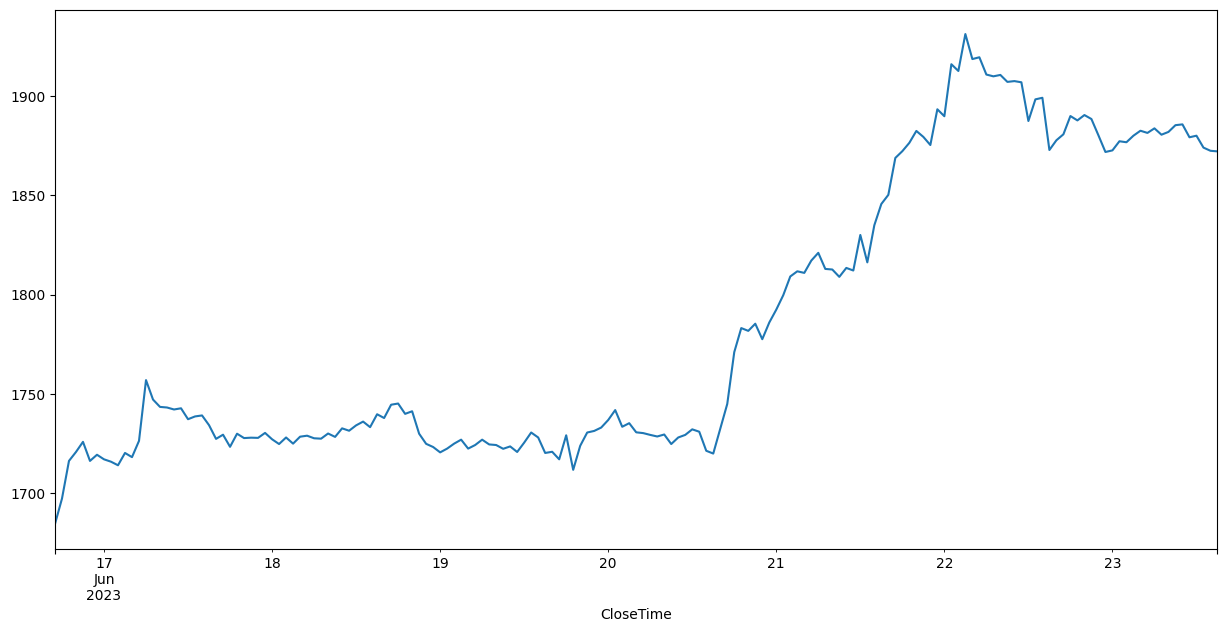

In [11]:
eth['ClosePrice'].plot(figsize=(15, 7))

In [12]:
xrp.head()


,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-06-16 17:00:00,0.46482,0.46553,0.46138,0.46398,5.608729e+06,2.598679e+06
2023-06-16 18:00:00,0.46398,0.46996,0.46378,0.46973,4.573986e+06,2.133496e+06
2023-06-16 19:00:00,0.46970,0.47672,0.46849,0.47153,1.184199e+06,5.587997e+05
2023-06-16 20:00:00,0.47147,0.47324,0.46804,0.47256,6.161066e+05,2.897576e+05
2023-06-16 21:00:00,0.47353,0.47370,0.47078,0.47306,1.806505e+05,8.539895e+04


<Axes: xlabel='CloseTime'>

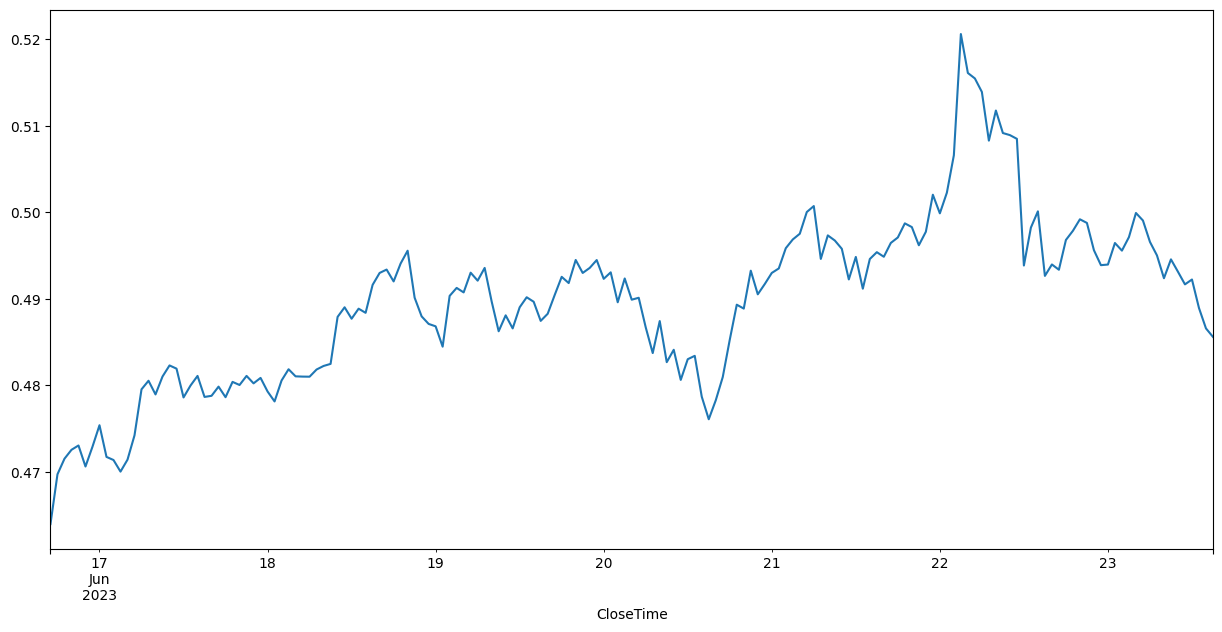

In [13]:
xrp['ClosePrice'].plot(figsize=(15, 7))

In [14]:
btc['ClosePrice'].corr(eth['ClosePrice'])

0.987890842236481

In [15]:
btc['ClosePrice'].corr(xrp['ClosePrice'])

0.7381120231765967